In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## <Step1. 탐색적 분석 > : UK Retail 데이터 분석하기
#### [UK Retail 데이터셋의 기본 정보]
데이터 피처 설명
*   InvoiceNo : 거래 고유 번호
*   StockCode : 상품 고유 번호
*   Description : 상품명
*   Quantity : 거래 수량
*   InvoiceDate : 거래 일시
*   UnitPrice : 상품 단가
*   CustomerID : 구매자 고유 번호
*   Country : 구매 국가

In [3]:
df = pd.read_csv('./online_retail.csv', dtype={'CustomerID':str, 'InvoiceDate':str}, encoding="ISO-8859-1")
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format="%m/%d/%Y %H:%M")

In [4]:
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  object        
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 33.1+ MB
None


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


결측 데이터 제거

In [5]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [6]:
# 결측치 제거
df = df.dropna()
print(df.shape)

(406829, 8)


탐색 데이터의 조건 필터링

In [7]:
# 상품수량이 음수인 경우를 제거
print(df[df['Quantity']<=0].shape[0])
df = df[df['Quantity']>0]

8905


In [8]:
# 상품 가격이 0 이하인 경우를 제거
print(df[df['UnitPrice']<=0].shape[0])
df = df[df['UnitPrice']>0]

40


In [9]:
# 상품 코드가 일반적이지 않은 경우를 탐색
df['ContainDigit'] = df['StockCode'].apply(lambda x : any(c.isdigit() for c in x))
print(df[df['ContainDigit'] == False].shape[0])
df[df['ContainDigit']==False].head()

1414


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,ContainDigit
45,536370,POST,POSTAGE,3,2010-12-01 08:45:00,18.00,12583,France,False
386,536403,POST,POSTAGE,1,2010-12-01 11:27:00,15.00,12791,Netherlands,False
1123,536527,POST,POSTAGE,1,2010-12-01 13:04:00,18.00,12662,Germany,False
2239,536569,M,Manual,1,2010-12-01 15:35:00,1.25,16274,United Kingdom,False
2250,536569,M,Manual,1,2010-12-01 15:35:00,18.95,16274,United Kingdom,False


In [10]:
# 상품 코드가 일반적이지 않은 경우를 제거한다.
df = df[df['ContainDigit']==True]

### [탐색적 데이터 분석]
일자별 거래 데이터 분석

In [11]:
# 거래 데이터에서 가장 오래된 데이터와 가장 최신의 데이터를 탐색
df['date'] = df['InvoiceDate'].dt.date
print(df['date'].min())
print(df['date'].max())

2010-12-01
2011-12-09


<AxesSubplot:xlabel='date'>

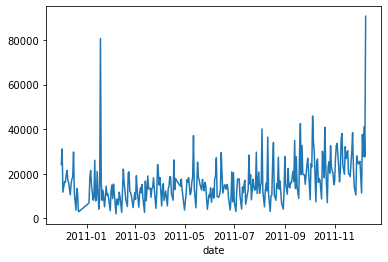

In [12]:
# 일자별 총 거래 수량을 탐색한다.
date_quantity_series = df.groupby('date')['Quantity'].sum()
date_quantity_series.plot()

<AxesSubplot:xlabel='date'>

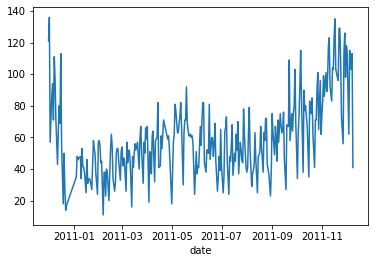

In [13]:
# 일자별 총 거래 횟수를 탐색한다.
date_transaction_series = df.groupby('date')['InvoiceNo'].nunique()
date_transaction_series.plot()

<AxesSubplot:xlabel='date'>

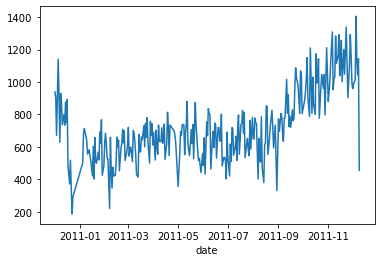

In [14]:
# 일자별 거래된 상품의 unique한 갯수, 즉 상품 거래 다양성을 탐색한다.
date_unique_item_series = df.groupby('date')['StockCode'].nunique()
date_unique_item_series.plot()

---
유저별 구매 패턴 분석

In [16]:
print(len(df['CustomerID']))
# 총 유저의 수를 계산하여 출력
print(len(df['CustomerID'].unique()))

396470
4334


In [17]:
# 유저별 거래 횟수를 탐색
customer_unique_transcation_series = df.groupby('CustomerID')['InvoiceNo'].nunique()
customer_unique_transcation_series.describe()

count    4334.000000
mean        4.246654
std         7.642535
min         1.000000
25%         1.000000
50%         2.000000
75%         5.000000
max       206.000000
Name: InvoiceNo, dtype: float64

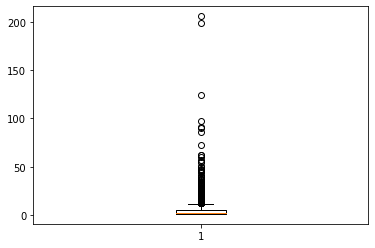

In [18]:
# 상자 그림 시각화로 살펴보기
plt.boxplot(customer_unique_transcation_series.values)
plt.show()

In [19]:
# 유저별 아이템 구매 종류 개수를 탐색
customer_unique_item_series = df.groupby('CustomerID')['StockCode'].nunique()
customer_unique_item_series.describe()

count    4334.000000
mean       61.432856
std        85.312937
min         1.000000
25%        16.000000
50%        35.000000
75%        77.000000
max      1786.000000
Name: StockCode, dtype: float64

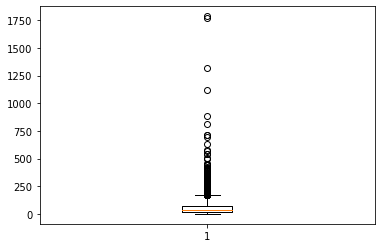

In [20]:
plt.boxplot(customer_unique_item_series.values)
plt.show()

유저가 아닌 상품을 기준으로 EDA를 실시

In [21]:
# 총 상품 갯수를 탐색
print(len(df['StockCode'].unique()))

3660


In [22]:
# 가장 거래가 많은 상품 top 10 탐색
df.groupby('StockCode')['InvoiceNo'].nunique().sort_values(ascending=False)[:10]

StockCode
85123A    1978
22423     1703
85099B    1600
47566     1379
84879     1375
20725     1289
22720     1146
23203     1080
20727     1052
22383     1043
Name: InvoiceNo, dtype: int64

count     3660.000000
mean      1409.149727
std       3513.654056
min          1.000000
25%         65.000000
50%        395.000000
75%       1417.500000
max      80995.000000
Name: Quantity, dtype: float64


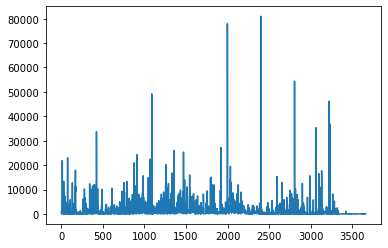

In [23]:
# 상품별 판매수량 분포를 탐색
print(df.groupby('StockCode')['Quantity'].sum().describe())
plt.plot(df.groupby('StockCode')['Quantity'].sum().values)
plt.show()

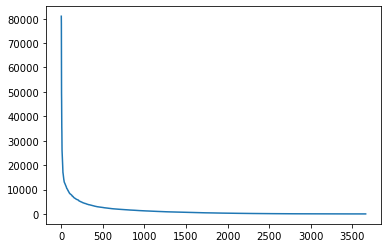

In [24]:
# 분포를 정렬하여 출력
plt.plot(df.groupby('StockCode')['Quantity'].sum().sort_values(ascending=False).values)
plt.show()

In [25]:
# 거래별로 발생한 가격에 대해 탐색
df['amount'] = df['Quantity'] * df['UnitPrice']
df.groupby('InvoiceNo')['amount'].sum().describe()

count     18405.000000
mean        476.378845
std        1678.749892
min           0.380000
25%         157.900000
50%         302.360000
75%         465.700000
max      168469.600000
Name: amount, dtype: float64

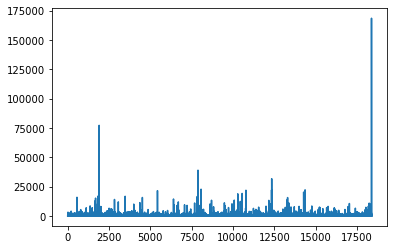

In [26]:
# 거래별로 발생한 가격 분포 탐색
plt.plot(df.groupby('InvoiceNo')['amount'].sum().values)
plt.show()

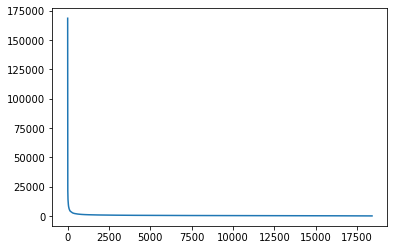

In [27]:
# 분포를 정렬하여 출력
plt.plot(df.groupby('InvoiceNo')['amount'].sum().sort_values(ascending=False).values)
plt.show()

---
시계열 기준으로 데이터 분리

In [28]:
import datetime

# 2011년 11월을 기준으로 하여, 기준 이전과 이후로 데이터를 분리한다.
df_year_round = df[df['date'] < datetime.date(2011,11,1)]
df_year_end = df[df['date'] >= datetime.date(2011,11,1)]
print(df_year_round.shape)
print(df_year_end.shape)

(314902, 11)
(81568, 11)


---
분리된 데이터에서 구매 패턴 탐색 : 재구매, 신규 구매 등의 여부

In [29]:
# 11월 이전 데이터에서 구매했던 상품의 set을 추출한다.
customer_item_round_set = df_year_round.groupby('CustomerID')['StockCode'].apply(set)
print(customer_item_round_set)

CustomerID
12346                                              {23166}
12347    {21636, 47580, 22371, 22494, 84991, 23480, 224...
12348    {84992, 23077, 21977, 23078, 84991, 21213, 219...
12350    {22551, 79191C, 20652, 21171, 22557, 22412, 22...
12352    {84050, 22979, 22853, 23245, 21380, 21755, 227...
                               ...                        
18280    {82484, 22467, 22180, 22727, 22358, 22084, 224...
18281    {23008, 22467, 22028, 23209, 23007, 22716, 22037}
18282    {21270, 22424, 23187, 23295, 22089, 21108, 21109}
18283    {22551, 47580, 21929, 21717, 22327, 23203, 219...
18287    {23376, 23223, 22753, 22866, 72351A, 22758, 22...
Name: StockCode, Length: 3970, dtype: object


In [30]:
# 11월 이전에 구매했는지 혹은 이후에 구매했느지를 유저별로 기록하기 위한 사전을 정의
customer_item_dict = {}

# 11월 이전에 구매한 상품은 'old' 라고 표기
for customer_id, stocks in customer_item_round_set.items():
    customer_item_dict[customer_id] = {}
    for stock_code in stocks:
        customer_item_dict[customer_id][stock_code] = 'old'

print(str(customer_item_dict)[:100] + '...')

{'12346': {'23166': 'old'}, '12347': {'21636': 'old', '47580': 'old', '22371': 'old', '22494': 'old'...


In [31]:
# 11월 이후 데이터에서 구매하는 상품의 set을 추출
customer_item_end_set = df_year_end.groupby('CustomerID')['StockCode'].apply(set)
print(customer_item_end_set)

CustomerID
12347    {23552, 23271, 21731, 23084, 23508, 21265, 235...
12349    {23545, 22567, 21411, 23236, 23283, 23263, 226...
12352    {22978, 23096, 22627, 22178, 21669, 22635, 233...
12356                                       {21843, 22423}
12357    {21411, 23317, 22026, 22191, 22358, 22312, 223...
                               ...                        
18272    {22074, 23236, 22666, 22075, 23495, 22076, 843...
18273                                             {79302M}
18274    {22851, 21974, 23243, 23245, 84988, 22423, 227...
18282                  {23175, 22818, 23174, 22423, 22699}
18283    {22571, 22551, 23380, 22574, 23203, 21931, 235...
Name: StockCode, Length: 1904, dtype: object


In [32]:
# 11월 이전에만 구매한 상품은 'old', 이후에만 구매한 상품은 'new', 모두 구매한 상품은 'both'

for customer_id, stocks in customer_item_end_set.items():
    # 11월 이전 구매기록이 있는 유저인지 체크
    if customer_id in customer_item_dict:
        for stock_code in stocks:
            # 구매한 적 있는 상품인지를 체크한 뒤, 상태를 표기
            if stock_code in customer_item_dict[customer_id]:
                customer_item_dict[customer_id][stock_code] = 'both'
            else :
                customer_item_dict[customer_id][stock_code] = 'new'
                
    # 11월 이전 구매 기록이 없는 유저라면 모두 'new'로 표기
    else :
        customer_item_dict[customer_id] = {}
        for stock_code in stocks:
            customer_item_dict[customer_id][stock_code] = 'new'
            
print(str(customer_item_dict)[:100] + '...')

{'12346': {'23166': 'old'}, '12347': {'21636': 'old', '47580': 'old', '22371': 'old', '22494': 'old'...


In [33]:
# 'old', 'new', 'both'를 유저별로 탐색하여 데이터 프레임을 생성
columns = ['CustomerID', 'old', 'new', 'both']
df_order_info = pd.DataFrame(columns=columns)

# 데이터 프레임을 생성하는 과정
for customer_id in customer_item_dict:
    old = 0
    new = 0
    both = 0
    
    # 딕셔너리의 상품 상태(old, new, both)를 체크하여 데이터 프레임에 append 할 수 있는 형태로 처리
    for stock_code in customer_item_dict[customer_id]:
        status = customer_item_dict[customer_id][stock_code]
        if status == 'old':
            old += 1
        elif status == 'new':
            new += 1
        else :
            both += 1
            
    # df_order_info에 데이터를 append 
    row = [customer_id, old, new, both]
    series = pd.Series(row, index=columns)
    df_order_info = df_order_info.append(series, ignore_index=True)
    
df_order_info.head()

C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead

C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead

C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead

C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead

C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead

C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead

C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead

C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead

C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead

C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead

C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead

C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead

C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead

C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead

C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead

C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead

C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead

C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead

C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead

C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead

C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead

C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead

C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead

C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead

C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead

C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead

C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead

C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead

C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead

C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead

C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead

C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead

C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead

C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead

C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead

C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead

C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead

C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead

C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead

C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead

C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead

C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead

C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead

C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead

C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead

C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead

C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead

C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead

C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead

C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead

C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead

C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead

C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead

C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead

C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead

C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead

C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead

C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead

C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead

C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead

C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead

C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead

C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead

C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead

C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead

C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead

C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead

C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead

C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead

C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead

C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead

C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead

C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead

C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead

C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead

C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead

C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead

C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead

C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead

C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead

C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead

C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead

C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead

C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead

C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead

C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead

C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead

C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead

C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead

C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead

C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead

C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead

C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead

C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead

C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead

C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead

C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead

C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead

C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead

C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead

C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead

C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead

C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead

C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead

C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead

C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead

C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead

C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead

C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead

C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead

C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead

C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead

C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead

C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead

C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead

C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead

C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead

C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead

C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead

C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead

C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead

C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead

C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_order_info = df_order_info.append(series, ignore_index=True)
C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\1395176189.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead

,CustomerID,old,new,both
0,12346,1,0,0
1,12347,92,3,8
2,12348,21,0,0
3,12350,16,0,0
4,12352,43,12,2


In [35]:
# 데이터 프레임에서 전체 유저 수를 출력
print("전체 유저의 수 : ",df_order_info.shape[0])

# 데이터프레임에서 old가 1 이상이면서, new가 1 이상인 유저 수를 출력
# 11월 이후에 기존에 구매한적 없는 새로운 상품을 구매한 유저를 의미
print("새로운 상품을 구매한 유저의 수 : ",df_order_info[(df_order_info['old']>0) & (df_order_info['new']>0)].shape[0])

# 데이터 프레임에서 both가 1이상인 유저 수를 출력한다.
# 재구매한 상품이 있는 유저 수를 의미한다.
print("재구매한 유저의 수 : ",df_order_info[df_order_info['both']>0].shape[0])

전체 유저의 수 :  4334
새로운 상품을 구매한 유저의 수 :  1446
재구매한 유저의 수 :  1426


In [36]:
# new 피처의 value_counts를 출력하여, 새로운 상품을 얼마나 구매하는지 탐색
df_order_info['new'].value_counts()

0      2521
1        81
3        73
2        72
8        65
       ... 
116       1
157       1
124       1
130       1
99        1
Name: new, Length: 133, dtype: int64

In [38]:
# 만약 새로운 상품을 구매한다면, 얼마나 많은 종류의 새로운 상품을 구매하는 지 탐색
print(df_order_info['new'].value_counts()[1:].describe())

count    132.000000
mean      13.734848
std       19.130672
min        1.000000
25%        1.000000
50%        5.000000
75%       16.000000
max       81.000000
Name: new, dtype: float64


## <Step2. 예측 분석> : SVD를 활용한 상품 구매 예측
### [피처 엔지니어링]

In [42]:
# 추천 대상 데이터에 포함되는 유저와 상품의 갯수를 출력
print(len(df_year_round['CustomerID'].unique()))
print(len(df_year_end['CustomerID'].unique()))

3970
1904


SVD 모델에 사용할 데이터 : User-Item간의 Rating 데이터 생성

In [43]:
# Rating 데이터를 생성하기 위한 탐색 : 유저-상품간 구매 횟수를 탐색
uir_df = df_year_round.groupby(['CustomerID','StockCode'])['InvoiceNo'].nunique().reset_index()
uir_df.head()

,CustomerID,StockCode,InvoiceNo
0,12346,23166,1
1,12347,16008,1
2,12347,17021,1
3,12347,20665,1
4,12347,20719,3


<AxesSubplot:>

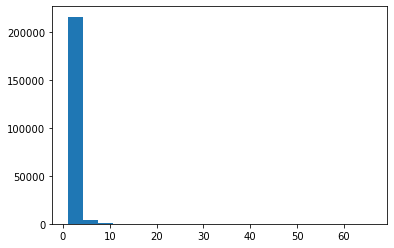

In [44]:
# Rating (InvoiceNo) 피처의 분포를 탐색
uir_df['InvoiceNo'].hist(bins=20, grid=False)

<AxesSubplot:>

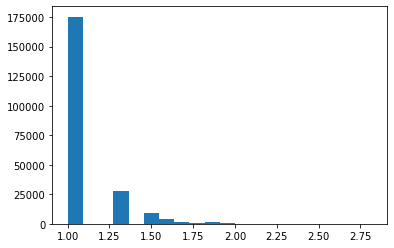

In [45]:
# Rating(InvoiceNo) 피처를 log noramlization 해준 뒤 ,다시 분포 보기
uir_df['InvoiceNo'].apply(lambda x: np.log10(x)+1).hist(bins=20, grid=False)

<AxesSubplot:>

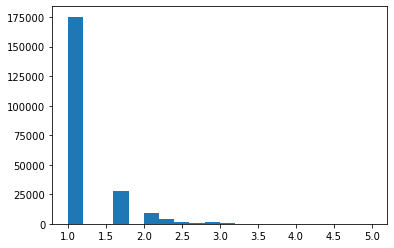

In [46]:
# 1 - 5 사이의 점수로 변환
uir_df['Rating'] = uir_df['InvoiceNo'].apply(lambda x : np.log10(x)+1)
uir_df['Rating'] = ((uir_df['Rating'] - uir_df['Rating'].min()) /
                   (uir_df['Rating'].max() - uir_df['Rating'].min()) *4) + 1
uir_df['Rating'].hist(bins=20, grid=False)

---
### [SVD 모델 학습하기]

In [47]:
# SVD 모델 학습을 위한 데이터셋 생성
uir_df = uir_df[['CustomerID','StockCode','Rating']]
uir_df.tail()

,CustomerID,StockCode,Rating
220902,18287,84920,1.00000
220903,18287,85039A,1.66177
220904,18287,85039B,1.66177
220905,18287,85040A,1.00000
220906,18287,85173,1.00000


In [48]:
import time
from surprise import SVD, Dataset, Reader, accuracy
from surprise.model_selection import train_test_split

# SVD 라이브러리를 사용하기 위한 학습 데이터를 생성, 대략적인 성능을 알아보기 위해 학습 데이터와 테스트 데이터를 8:2로 분할
reader = Reader(rating_scale=(1,5))
data = Dataset.load_from_df(uir_df[['CustomerID','StockCode','Rating']], reader)
train_data, test_data = train_test_split(data, test_size=0.2)

# SVD 모델 학습하기
train_start = time.time()
model = SVD(n_factors=8,
            lr_all=0.005,
            reg_all=0.02,
            n_epochs=200)
model.fit(train_data)
train_end = time.time()
print('traing time of model : %.2f seconds'%(train_end - train_start))

pred = model.test(test_data)

# 테스트 데이터의 RMSE를 출력하여 모델의 성능을 평가
print('RMSE of test dataset in SVD model :')
accuracy.rmse(pred)

traing time of model : 33.25 seconds
RMSE of test dataset in SVD model :
RMSE: 0.3355


0.33548602604593303

In [50]:
# SVD 라이브러리를 사용하기 위한 학습 데이터를 생성. 11월 이전 전체를 full trainset으로 설정
reader = Reader(rating_scale=(1,5))
data = Dataset.load_from_df(uir_df[['CustomerID', 'StockCode','Rating']], reader)
train_data = data.build_full_trainset()

# SVD 모델 학습하기
train_start = time.time()
model = SVD(n_factors=8,
            lr_all=0.005,
            reg_all=0.02,
            n_epochs=200)
model.fit(train_data)
train_end = time.time()
print('traing time of model : %.2f seconds'%(train_end - train_start))

traing time of model : 38.72 seconds


## <Step3. 예측 평가하기> : 상품 추천 시뮬레이션

In [51]:
'''
11월 이전 데이터에서 유저-상품에 대한 Rating을 기반으로 추천 상품을 선정

1. 이전에 구매하지 않았던 상품 추천 : build_anti_testset()을 사용
2. 이전에 구매했던 상품 다시 추천 : build_testset()을 사용
3. 모든 상품을 대상으로 하여 상품 추천
'''

# 이전에 구매하지 않았던 상품을 예측의 대상으로 선정
test_data = train_data.build_anti_testset()
target_user_pred = model.test(test_data)

# 구매 예측 결과를 딕셔너리 형태로 변환
new_order_pred_dict = {}
for customer_id, stock_code, _, pred_rating, _ in target_user_pred:
    if customer_id in new_order_pred_dict:
        if stock_code in new_order_pred_dict[customer_id]:
            pass
        else :
            new_order_pred_dict[customer_id][stock_code] = pred_rating
    else :
        new_order_pred_dict[customer_id] = {}
        new_order_pred_dict[customer_id][stock_code] = pred_rating
        
print(str(new_order_pred_dict)[:300] + '...')

{'12346': {'16008': 1, '17021': 1.1825224972263835, '20665': 1.0069088952432024, '20719': 1.1225588527263783, '20780': 1, '20782': 1.1301439557646595, '20966': 1.009470389777816, '21035': 1.0688716260748004, '21041': 1.0491138806152425, '21064': 1.1323101116748935, '21154': 1.0776752979476563, '2117...


In [54]:
# 이전에 구매했었던 상품을 예측의 대상으로 산정
test_data = train_data.build_testset()
target_user_pred = model.test(test_data)

# 구매 예측 결과를 딕셔너리 형태로 변환
reorder_pred_dict = {}
for customer_id, stock_code, _, pred_rating, _ in target_user_pred:
    if customer_id in reorder_pred_dict:
        if stock_code in reorder_pred_dict[customer_id]:
            pass
        else :
            reorder_pred_dict[customer_id][stock_code] = pred_rating
    else :
        reorder_pred_dict[customer_id] = {}
        reorder_pred_dict[customer_id][stock_code] = pred_rating
        
print(str(reorder_pred_dict)[:300] + '...')

{'12346': {'23166': 1.0587910471620094}, '12347': {'16008': 1.214391201913462, '17021': 1.1895128304158975, '20665': 1.2842267737225062, '20719': 1.6039579301640128, '20780': 1.2151286390948866, '20782': 1.222742755706151, '20966': 1.1869511435194822, '21035': 1.4671101256200796, '21041': 1.64364596...


In [55]:
# 두 딕셔너리를 하나로 통합
total_pred_dict = {}

# new_order_pred_dict 정보를 새로운 딕셔너리에 저장
for customer_id in new_order_pred_dict:
    if customer_id not in total_pred_dict:
        total_pred_dict[customer_id] = {}
    for stock_code, pred_rating in new_order_pred_dict[customer_id].items():
        if stock_code not in total_pred_dict[customer_id]:
            total_pred_dict[customer_id][stock_code] = pred_rating
            
# reorder_pred_dict 정보를 새로운 딕셔너리에 저장
for customer_id in reorder_pred_dict:
    if customer_id not in total_pred_dict:
        total_pred_dict[customer_id] = {}
    for stock_code, pred_rating in reorder_pred_dict[customer_id].items():
        if stock_code not in total_pred_dict[customer_id]:
            total_pred_dict[customer_id][stock_code] = pred_rating
            
print(str(total_pred_dict)[:300] + '...')

{'12346': {'16008': 1, '17021': 1.1825224972263835, '20665': 1.0069088952432024, '20719': 1.1225588527263783, '20780': 1, '20782': 1.1301439557646595, '20966': 1.009470389777816, '21035': 1.0688716260748004, '21041': 1.0491138806152425, '21064': 1.1323101116748935, '21154': 1.0776752979476563, '2117...


In [58]:
# 11월 이후의 데이터를 테스트 데이터셋으로 사용하기 위한 데이터프레임을 생성
simulation_test_df = df_year_end.groupby('CustomerID')['StockCode'].apply(set).reset_index()
simulation_test_df.columns = ['CustomerID', 'RealOrdered']
simulation_test_df.head()

,CustomerID,RealOrdered
0,12347,"{23552, 23271, 21731, 23084, 23508, 21265, 235..."
1,12349,"{23545, 22567, 21411, 23236, 23283, 23263, 226..."
2,12352,"{22978, 23096, 22627, 22178, 21669, 22635, 233..."
3,12356,"{21843, 22423}"
4,12357,"{21411, 23317, 22026, 22191, 22358, 22312, 223..."


In [59]:
# 이 데이터프레임에 상품 추천 시뮬레이션 결과를 추가하기 위한 함수를 정의
def add_pred_stock_set(customer_id, pred_dict):
    if customer_id in pred_dict:
        pred_stock_dict = pred_dict[customer_id]
        # 예측된 상품의 Rating이 높은 순으로 정렬
        sorted_stocks = sorted(pred_stock_dict, key=lambda x : pred_stock_dict[x], reverse=True)
        return sorted_stocks
    else : 
        return None

# 사품 추천 시뮬레이션 결과를 추가
simulation_test_df['PredictedOrder(New)'] = simulation_test_df['CustomerID']. \
                                             apply(lambda x : add_pred_stock_set(x, new_order_pred_dict))
simulation_test_df['PredictedOrder(Reorder)'] = simulation_test_df['CustomerID']. \
                                             apply(lambda x : add_pred_stock_set(x, reorder_pred_dict))
simulation_test_df['PredictedOrder(Total)'] = simulation_test_df['CustomerID']. \
                                             apply(lambda x : add_pred_stock_set(x, total_pred_dict))

simulation_test_df.head()

,CustomerID,RealOrdered,PredictedOrder(New),PredictedOrder(Reorder),PredictedOrder(Total)
0,12347,"{23552, 23271, 21731, 23084, 23508, 21265, 235...","[20727, 22659, 37448, 84086B, 22616, 22381, 21...","[21731, 22726, 22728, 22727, 22423, 21975, 223...","[21731, 22726, 20727, 22659, 37448, 22728, 840..."
1,12349,"{23545, 22567, 21411, 23236, 23283, 23263, 226...",None,None,None
2,12352,"{22978, 23096, 22627, 22178, 21669, 22635, 233...","[90119, 84086B, 85131B, 46115B, 90035A, 85131D...","[22779, 22423, 22780, 37448, 22701, 84050, 229...","[90119, 84086B, 85131B, 46115B, 90035A, 85131D..."
3,12356,"{21843, 22423}","[84086B, 85131B, 90119, 22197, 90035A, 90042A,...","[21843, 22423, 22649, 21212, 22699, 21527, 210...","[84086B, 85131B, 90119, 22197, 90035A, 90042A,..."
4,12357,"{21411, 23317, 22026, 22191, 22358, 22312, 223...",None,None,None


In [69]:
my_dict = new_order_pred_dict['12347']
print(my_dict)

{'23166': 1.4276704163757274, '21211': 1.0401364712784407, '21213': 1.8717897967586883, '21725': 1.2164221921417153, '21726': 1.5360035856176308, '21967': 1.4641352420302889, '21977': 1.8274204646022731, '21980': 1.4151826393590303, '21981': 1.4358721885279369, '21982': 1.7109190781823882, '21983': 1.1556495819929793, '21985': 1.7312176160716544, '22437': 1.223895697895957, '22616': 1.991701546848664, '22951': 1.7526448178691094, '22952': 1.1930906927607396, '23077': 1.267162225573596, '23078': 1.2464506979078012, '84988': 1.4746265236410265, '20615': 1.1440100715111616, '20652': 1.0495778955617785, '21864': 1.24170220525462, '21866': 1.1380228406393993, '21908': 1.2645063796866713, '21915': 1.6489817971601295, '22348': 1.8853030034492844, '22412': 1.423755431720123, '22551': 1.759250210027133, '22557': 1.582443913979291, '22620': 1.1966034155942757, '79066K': 1.3630477604059479, '79191C': 1.287806565093392, '84086C': 1.452420224784369, '21232': 1.956737860550573, '21314': 1.2139615776

In [70]:
sorted_stocks = sorted(my_dict, key=lambda x : my_dict[x], reverse=True)
print(sorted_stocks)

['20727', '22659', '37448', '84086B', '22616', '22381', '21232', '22554', '22383', '20749', '20679', '23004', '20914', '22900', '21669', '22556', '23209', 'C2', '22348', '20668', '20726', '21213', '21326', '84692', '22467', '23206', '22431', '22384', '47590A', '90214K', '21935', '21977', '84978', '22219', '15056BL', '22379', '23199', '21080', '85129D', '84971S', '22995', '90119', '22077', '21094', '85123A', '15056N', '90035A', '22730', '20829', '22326', '84077', '85131B', '22227', '22493', '22382', '23208', '22551', '21201', '22421', '22951', '23049', '20725', '22998', '23000', '22558', '47422', '23203', '20728', '21985', '22676', '22466', '20996', '22996', '21700', '22420', '22846', '22059', '21086', '22419', '21982', '22553', '21993', '22064', '21523', '47590B', '22197', '21212', '20750', '21123', '23240', '22147', '21463', '84536A', '21034', '85078', '17003', '84358', '22555', '21495', '22243', '22649', '85114A', '20717', '84879', '20718', '21464', '20972', '23202', '22994', '23238'

---
### [상품 추천 평가하기]
평가 기준 정의하기

In [79]:
# 구매 예측의 상위 k개의 recall(재현율)을 평가 기준으로 정의합니다.
def calculate_recall(real_order, predicted_order, k):
    # 만약 추천 대상 상품이 없다면, 11월 이후에 상품을 처음 구매하는 유저입니다.
    if predicted_order is None:
        return None
    
    # SVD 모델에서 현재 유저의 Rating이 높은 상위 k개의 상품을 "구매 할 것으로 예측"합니다.
    predicted = predicted_order[:k]
    true_positive = 0
    for stock_code in predicted:
        if stock_code in real_order:
            true_positive += 1
    
    # 예측한 상품 중, 실제로 유저가 구매한 상품의 비율(recall)을 계산합니다.
    recall = true_positive / len(predicted)
    return recall

# 시뮬레이션 대상 유저에게 상품을 추천해준 결과를 평가합니다.
simulation_test_df['top_k_recall(Reorder)'] = simulation_test_df. \
                                                apply(lambda x: calculate_recall(x['RealOrdered'], 
                                                                                 x['PredictedOrder(Reorder)'], 
                                                                                 5), axis=1)
simulation_test_df['top_k_recall(New)'] = simulation_test_df. \
                                                apply(lambda x: calculate_recall(x['RealOrdered'], 
                                                                                 x['PredictedOrder(New)'], 
                                                                                 5), axis=1)
simulation_test_df['top_k_recall(Total)'] = simulation_test_df. \
                                                apply(lambda x: calculate_recall(x['RealOrdered'], 
                                                                                 x['PredictedOrder(Total)'], 
                                                                                 5), axis=1)

In [80]:
# 평가 결과를 유저 평균으로 살펴봅니다.
print(simulation_test_df['top_k_recall(Reorder)'].mean())
print(simulation_test_df['top_k_recall(New)'].mean())
print(simulation_test_df['top_k_recall(Total)'].mean())

0.3142532467532449
0.005844155844155844
0.06610389610389635


In [81]:
# 평가 결과를 점수 기준으로 살펴보기
simulation_test_df['top_k_recall(Reorder)'].value_counts()

0.000000    459
0.200000    403
0.400000    276
0.600000    186
0.800000    122
1.000000     75
0.500000      7
0.250000      6
0.666667      4
0.750000      1
0.333333      1
Name: top_k_recall(Reorder), dtype: int64

In [82]:
# 평가 결과를 점수 기준으로 살펴보기
simulation_test_df['top_k_recall(New)'].value_counts()

0.0    1497
0.2      41
0.4       2
Name: top_k_recall(New), dtype: int64

In [83]:
# 평가 결과를 점수 기준으로 살펴보기
simulation_test_df['top_k_recall(Total)'].value_counts()

0.0    1240
0.2     184
0.4      53
0.6      38
0.8      20
1.0       5
Name: top_k_recall(Total), dtype: int64

In [84]:
# SVD 모델의 추천기준에 부합하지 않는 유저를 추출합니다.
not_recommended_df = simulation_test_df[simulation_test_df['PredictedOrder(Reorder)'].isnull()]
print(not_recommended_df.shape)
not_recommended_df.head()

(364, 8)


,CustomerID,RealOrdered,PredictedOrder(New),PredictedOrder(Reorder),PredictedOrder(Total),top_k_recall(Reorder),top_k_recall(New),top_k_recall(Total)
1,12349,"{23545, 22567, 21411, 23236, 23283, 23263, 226...",None,None,None,NaN,NaN,NaN
4,12357,"{21411, 23317, 22026, 22191, 22358, 22312, 223...",None,None,None,NaN,NaN,NaN
8,12367,"{22045, 16237, 21579, 22708, 22631, 21576, 217...",None,None,None,NaN,NaN,NaN
9,12374,"{22810, 22818, 23354, 22408, 22733, 84992, 214...",None,None,None,NaN,NaN,NaN
15,12391,"{22371, 16238, 22435, 23048, 23520, 20971, 222...",None,None,None,NaN,NaN,NaN


---
시뮬레이션 결과 살펴보기

In [85]:
# 추천 시뮬레이션 결과를 살펴봅니다.
k = 5
result_df = simulation_test_df[simulation_test_df['PredictedOrder(Reorder)'].notnull()]
result_df['PredictedOrder(Reorder)'] = result_df['PredictedOrder(Reorder)'].\
                                                        apply(lambda x: x[:k])
result_df = result_df[['CustomerID', 'RealOrdered', 
                       'PredictedOrder(Reorder)', 'top_k_recall(Reorder)']]
result_df.columns = [['구매자ID', '실제주문', '5개추천결과', 'Top5추천_주문재현도']]
result_df.sample(5).head()

C:\Users\rladl\AppData\Local\Temp\ipykernel_16572\263429871.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result_df['PredictedOrder(Reorder)'] = result_df['PredictedOrder(Reorder)'].\


,구매자ID,실제주문,5개추천결과,Top5추천_주문재현도
81,12577,"{21372, 10120, 23103, 21374, 23503, 21034, 232...","[20972, 21034, 21326, 22093, 22413]",0.2
59,12517,"{21245, 22534, 85049H, 22866, 23309, 22551, 22...","[85099B, 22326, 22197, 22383, 20725]",0.0
841,14921,"{22810, 23265, 23351, 23313, 35471D, 23318, 23...","[47566, 22568, 20972, 20764, 51014L]",0.0
1019,15525,"{22493, 23203, 22367, 23286, 23128, 23291, 226...","[22568, 22082, 22411, 22570, 22326]",0.0
207,12944,"{23103, 23192, 23503, 23311, 22726, 23084, 232...","[21166, 22729, 22727, 22398, 21485]",0.2
